In [1]:
import pandas as pd
import numpy as np


# Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

# To supress warnings in Visualizations
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw=pd.read_csv(r"C:\Users\sathy\Downloads\Telegram Desktop\Performance (2).csv")

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student Name            1000 non-null   object 
 1   Age                     979 non-null    float64
 2   Gender                  1000 non-null   object 
 3   Institute Name          1000 non-null   object 
 4   Course Name             1000 non-null   object 
 5   class_Type              1000 non-null   object 
 6   Duration                981 non-null    object 
 7   Assignments submitted   987 non-null    float64
 8   projects submitted      992 non-null    float64
 9   Mock_Test               987 non-null    float64
 10  Attendance(in %)        1000 non-null   int64  
 11  Certification obtained  1000 non-null   object 
 12  Final score(in %)       1000 non-null   int64  
 13  Placement status        1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory

In [7]:
raw.head()

,Student Name,Age,Gender,Institute Name,Course Name,class_Type,Duration,Assignments submitted,projects submitted,Mock_Test,Attendance(in %),Certification obtained,Final score(in %),Placement status
0,Riya Nair,21.0,Female,SocialPrachar,Ethical Hacking,Online,5 months,NaN,3.0,53.0,78,No Certification,64,No
1,Jhanvi Nair,22.0,Male,SocialPrachar,AI &ML,Online,6 months,9.0,NaN,75.0,80,NASSCOM Certification,71,Yes
2,Isha Pillai,25.0,Male,SocialPrachar,Cloud Computing,Offline,7 months,9.0,3.0,24.0,82,AWS Specialization,95,No
3,Aarohi Deshmukh,26.0,Male,SocialPrachar,Cloud Computing,Offline,6 months,5.0,3.0,79.0,88,NASSCOM Certification,66,Yes
4,Shivansh Nair,22.0,Female,SocialPrachar,Python Programming,Offline,NaN,8.0,2.0,96.0,86,AWS Specialization,90,Yes


In [9]:
raw.shape

(1000, 14)

In [11]:
len(raw['Final score(in %)'].unique())

41

In [13]:
raw['Placement status'].value_counts()

Placement status
No     584
Yes    416
Name: count, dtype: int64

In [15]:
raw.isnull().sum()

Student Name               0
Age                       21
Gender                     0
Institute Name             0
Course Name                0
class_Type                 0
Duration                  19
Assignments submitted     13
projects submitted         8
Mock_Test                 13
Attendance(in %)           0
Certification obtained     0
Final score(in %)          0
Placement status           0
dtype: int64

In [17]:
for col in raw.columns:
    print(f"Column: {col}")
    print()
    print(f"Data Type of Column: {raw[col].dtype}")
    print()
    print("Column Values:")
    print(raw[col].unique())
    print("=================================================================")
    print()

Column: Student Name

Data Type of Column: object

Column Values:
['Riya Nair' 'Jhanvi Nair' 'Isha Pillai' 'Aarohi Deshmukh' 'Shivansh Nair'
 'Neha Verma' 'Kabir Verma' 'Shruti Reddy' 'Gayatri Verma'
 'Aryan Venkatesh' 'Samar Chopra' 'Om Sharma' 'Laksh Iyer' 'Sai Pillai'
 'Harsh Sharma' 'Radha Chopra' 'Kunal Pandey' 'Kunal Bhat' 'Bhavna Nair'
 'Riya Verma' 'Vikram Kapoor' 'Aadhya Malhotra' 'Neha Gowda' 'Neha Sharma'
 'Gayatri Naidu' 'Shruti Kulkarni' 'Pooja Reddy' 'Pooja Chopra'
 'Suman Deshmukh' 'Arjun Malhotra' 'Priya Nair' 'Meera Mehta'
 'Shruti Chopra' 'Rohan Malhotra' 'Neha Chopra' 'Arjun Kulkarni'
 'Aarav Sharma' 'Kabir Gowda' 'Priya Kulkarni' 'Aryan Kulkarni'
 'Vivaan Tripathi' 'Yash Mehta' 'Aryan Tripathi' 'Vivaan Gupta'
 'Aditya Verma' 'Vikram Chopra' 'Suman Kapoor' 'Samar Reddy'
 'Shivansh Naidu' 'Rudra Gupta' 'Om Bhat' 'Laksh Joshi' 'Vikram Pillai'
 'Rohan Deshmukh' 'Arjun Gowda' 'Shivansh Pandey' 'Riya Deshmukh'
 'Priya Tripathi' 'Kabir Pandey' 'Om Nair' 'Pooja Deshmukh'
 '

In [19]:
# Step 2: Converting 'Duration' column to integer by removing 'months'
raw['Duration'] = raw['Duration'].str.replace(" months", "").astype(float)

In [21]:
# Use the 'replace' method to change the values within the column
raw['Placement status'] = raw['Placement status'].replace({'placed':'Placed'})

In [23]:
raw['Placement status'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
raw['Gender']= raw['Gender'].replace({'Male ':'Male','Female ':'Female'})

In [27]:
raw['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
raw['Duration'].unique()

array([ 5.,  6.,  7., nan,  8.])

In [31]:
raw[raw.duplicated()]

,Student Name,Age,Gender,Institute Name,Course Name,class_Type,Duration,Assignments submitted,projects submitted,Mock_Test,Attendance(in %),Certification obtained,Final score(in %),Placement status


In [33]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student Name            1000 non-null   object 
 1   Age                     979 non-null    float64
 2   Gender                  1000 non-null   object 
 3   Institute Name          1000 non-null   object 
 4   Course Name             1000 non-null   object 
 5   class_Type              1000 non-null   object 
 6   Duration                981 non-null    float64
 7   Assignments submitted   987 non-null    float64
 8   projects submitted      992 non-null    float64
 9   Mock_Test               987 non-null    float64
 10  Attendance(in %)        1000 non-null   int64  
 11  Certification obtained  1000 non-null   object 
 12  Final score(in %)       1000 non-null   int64  
 13  Placement status        1000 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory

In [35]:
! pip install simple_colors

In [37]:
########ACCESSING CODE USING PYTHON FILE FOR UNIVARIATE ANALYSIS
from eda import univariate

In [39]:
# Taking Columns in Order

# Taking Columns in Order
# Corrected column names if they were misspelled, 
# otherwise, ensure these columns exist in your 'raw' DataFrame.
data = raw[['Age', 'Gender', 'Institute Name','class_Type','Mock_Test', 'Course Name','Duration', 'Assignments submitted', 'projects submitted','Attendance(in %)', 'Certification obtained', 'Final score(in %)', 'Placement status']]

In [41]:
uni = univariate()

#######################################################
Taken Numeric Continuous Column: Age
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 23.36
Median: 23.0
Mode: 22.0

******** Measures of Dispersion ************
Range: 5.0
Variance: 2.09
Standard Deviation: 1.45
Five Number Summary:
min   21.00
25%   22.00
50%   23.00
75%   25.00
max   26.00
Name: Age, dtype: float64

******** Measures of Symmetry ************
Skewness: 0.28
Kurtosis: -1.27

Visual - Distplot (Histogram + Desnsity plot):



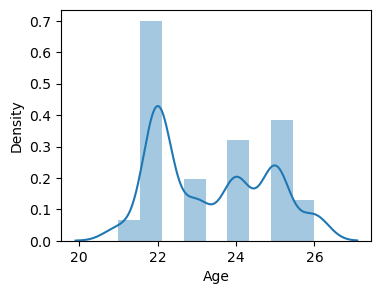

#######################################################
Taken Categorical Column: Gender
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['Female' 'Male']

Value Counts (FD) of each Category:
Gender
Female    544
Male      456
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Gender
Female   54.40
Male     45.60
Name: count, dtype: float64

Mode: Female

Visual - Pie Chart:

Top Catgeories:


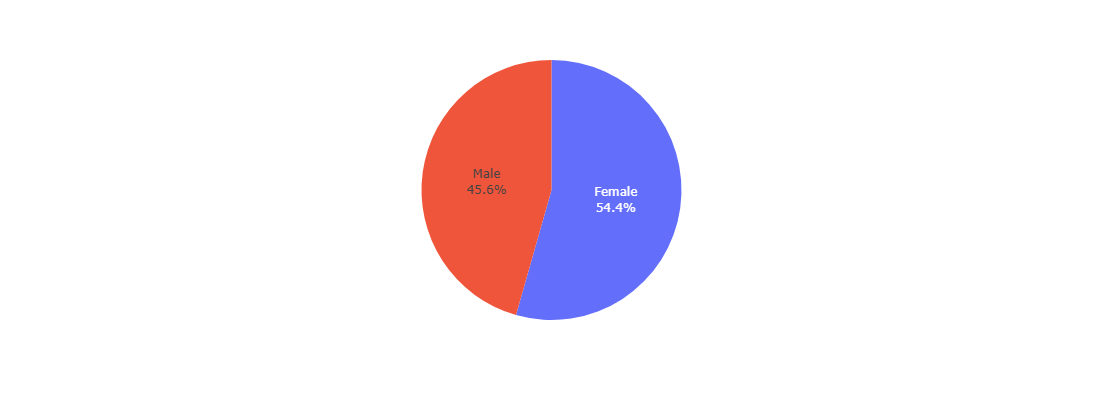


#######################################################
Taken Categorical Column: Institute Name
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 8
Category Names:
['SocialPrachar' 'Naresh i technologies' 'Levelup' 'Tech Academy'
 'CyberSecure Institute' 'CodeMasters' 'AI Hub' 'Cloud Innovators']

Value Counts (FD) of each Category:
Institute Name
CodeMasters              164
Tech Academy             152
SocialPrachar            141
CyberSecure Institute    135
AI Hub                   125
Cloud Innovators         100
Levelup                   95
Naresh i technologies     88
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Institute Name
CodeMasters             16.40
Tech Academy            15.20
SocialPrachar           14.10
CyberSecure Institute   13.50
AI Hub                  12.50
Cloud Innovators        10.00
Levelup                  9.50
Naresh i technologies    8.80
Name: co

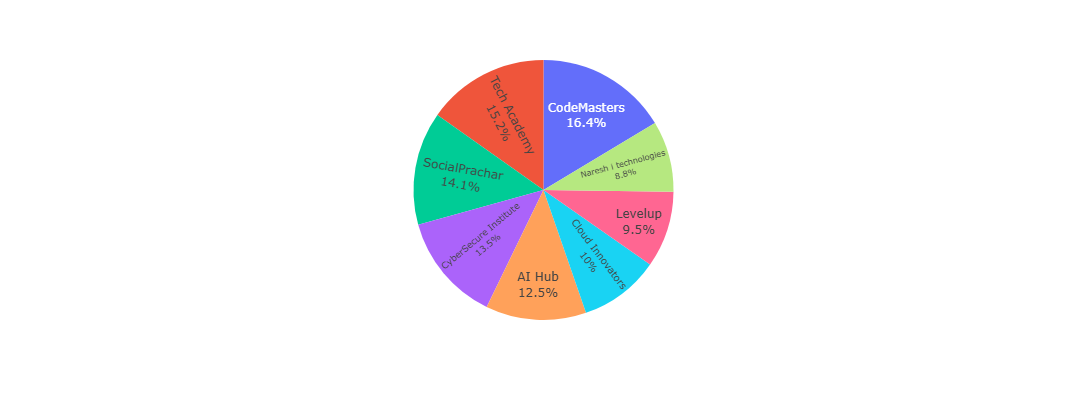


#######################################################
Taken Categorical Column: class_Type
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['Online' 'Offline']

Value Counts (FD) of each Category:
class_Type
Online     519
Offline    481
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
class_Type
Online    51.90
Offline   48.10
Name: count, dtype: float64

Mode: Online

Visual - Pie Chart:

Top Catgeories:


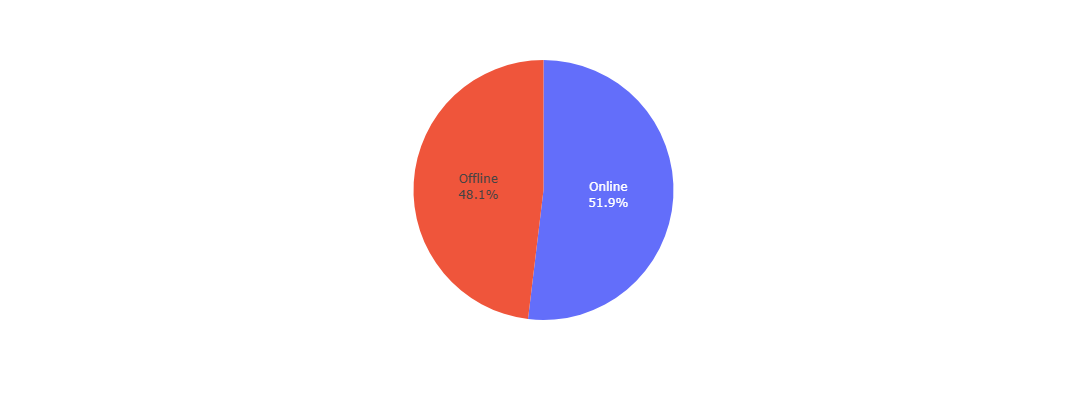


#######################################################
Taken Numeric Continuous Column: Mock_Test
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 50.54
Median: 50.0
Mode: 99.0

******** Measures of Dispersion ************
Range: 100.0
Variance: 877.47
Standard Deviation: 29.62
Five Number Summary:
min     0.00
25%    24.00
50%    50.00
75%    76.50
max   100.00
Name: Mock_Test, dtype: float64

******** Measures of Symmetry ************
Skewness: -0.0
Kurtosis: -1.24

Visual - Distplot (Histogram + Desnsity plot):



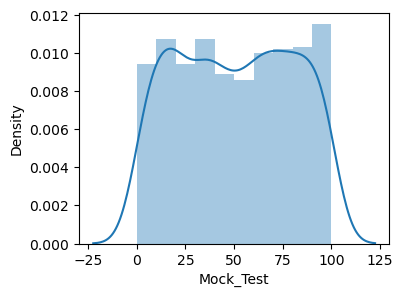

#######################################################
Taken Categorical Column: Course Name
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 10
Category Names:
['Ethical Hacking' 'AI &ML' 'Cloud Computing' 'Python Programming'
 'Robotics' 'Web Development' 'Software Testing' 'Data Science'
 'Cybersecurity' 'Data Analytics']

Value Counts (FD) of each Category:
Course Name
Robotics              127
Data Science          112
Python Programming    100
Data Analytics         98
Ethical Hacking        97
AI &ML                 97
Web Development        95
Cloud Computing        92
Software Testing       91
Cybersecurity          91
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Course Name
Robotics             12.70
Data Science         11.20
Python Programming   10.00
Data Analytics        9.80
Ethical Hacking       9.70
AI &ML                9.70
Web Development       9.50
Cloud Co

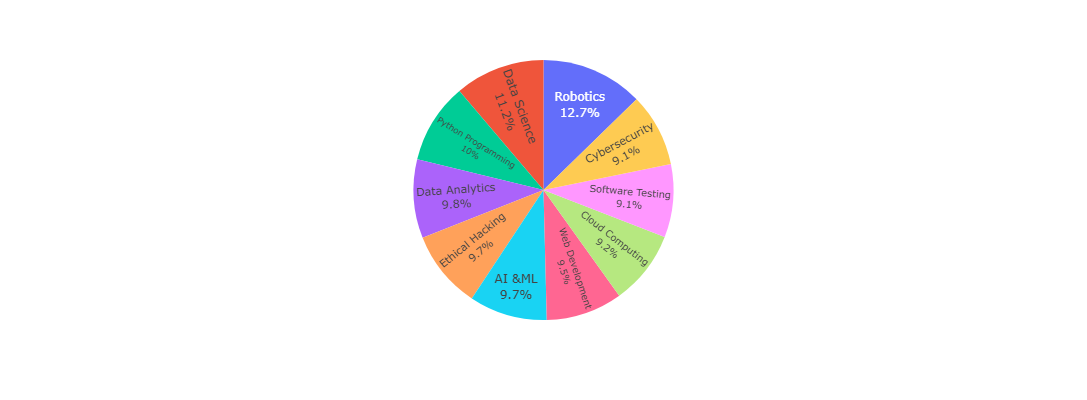


#######################################################
Taken Numeric Continuous Column: Duration
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 6.12
Median: 6.0
Mode: 6.0

******** Measures of Dispersion ************
Range: 3.0
Variance: 0.9
Standard Deviation: 0.95
Five Number Summary:
min   5.00
25%   5.00
50%   6.00
75%   7.00
max   8.00
Name: Duration, dtype: float64

******** Measures of Symmetry ************
Skewness: 0.49
Kurtosis: -0.66

Visual - Distplot (Histogram + Desnsity plot):



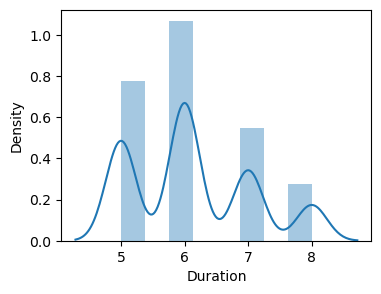

#######################################################
Taken Numeric Continuous Column: Assignments submitted
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 7.51
Median: 7.0
Mode: 7.0

******** Measures of Dispersion ************
Range: 65.0
Variance: 6.81
Standard Deviation: 2.61
Five Number Summary:
min    5.00
25%    6.00
50%    7.00
75%    9.00
max   70.00
Name: Assignments submitted, dtype: float64

******** Measures of Symmetry ************
Skewness: 13.95
Kurtosis: 333.05

Visual - Distplot (Histogram + Desnsity plot):



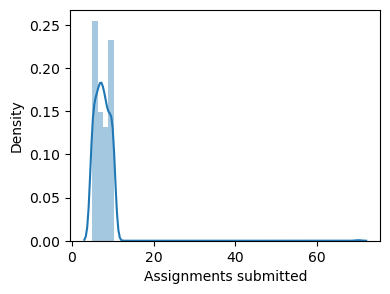

#######################################################
Taken Numeric Continuous Column: projects submitted
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 2.04
Median: 2.0
Mode: 2.0

******** Measures of Dispersion ************
Range: 2.0
Variance: 0.65
Standard Deviation: 0.81
Five Number Summary:
min   1.00
25%   1.00
50%   2.00
75%   3.00
max   3.00
Name: projects submitted, dtype: float64

******** Measures of Symmetry ************
Skewness: -0.07
Kurtosis: -1.46

Visual - Distplot (Histogram + Desnsity plot):



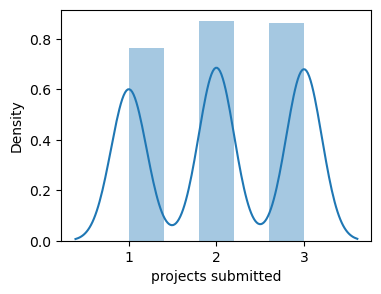

#######################################################
Taken Numeric Discrete Column: Attendance(in %)
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 85
Median: 85
Mode: 98

******** Measures of Dispersion ************
Range: 30
Variance: 85
Standard Deviation: 9
Five Number Summary:
min    70.00
25%    77.00
50%    85.00
75%    93.00
max   100.00
Name: Attendance(in %), dtype: float64

******** Measures of Symmetry ************
Skewness: 0.02
Kurtosis: -1.24

Visual - Distplot (Histogram + Desnsity plot):



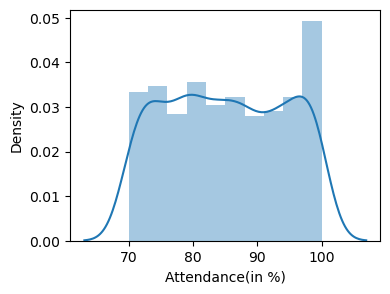

#######################################################
Taken Categorical Column: Certification obtained
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 6
Category Names:
['No Certification' 'NASSCOM Certification' 'AWS Specialization'
 'IIT Madras Standard Course'
 'Harvard University Professional Certificate'
 'IIT Madras Course Completion']

Value Counts (FD) of each Category:
Certification obtained
No Certification                               496
AWS Specialization                             134
NASSCOM Certification                          133
IIT Madras Standard Course                     123
Harvard University Professional Certificate    113
IIT Madras Course Completion                     1
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Certification obtained
No Certification                              49.60
AWS Specialization                            13.40
NASSCO

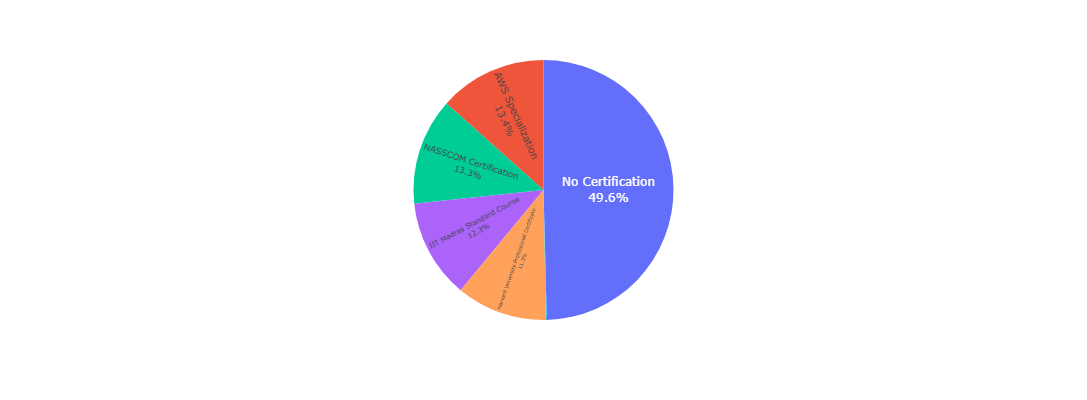


#######################################################
Taken Numeric Discrete Column: Final score(in %)
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 80
Median: 80
Mode: 77

******** Measures of Dispersion ************
Range: 40
Variance: 137
Standard Deviation: 12
Five Number Summary:
min    60.00
25%    70.00
50%    80.00
75%    90.00
max   100.00
Name: Final score(in %), dtype: float64

******** Measures of Symmetry ************
Skewness: 0.04
Kurtosis: -1.15

Visual - Distplot (Histogram + Desnsity plot):



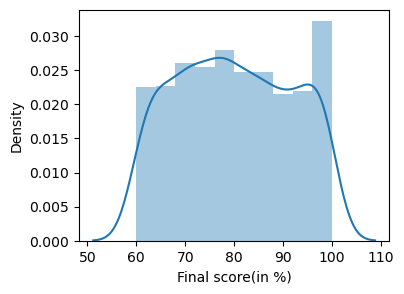

#######################################################
Taken Categorical Column: Placement status
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['No' 'Yes']

Value Counts (FD) of each Category:
Placement status
No     584
Yes    416
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Placement status
No    58.40
Yes   41.60
Name: count, dtype: float64

Mode: No

Visual - Pie Chart:

Top Catgeories:


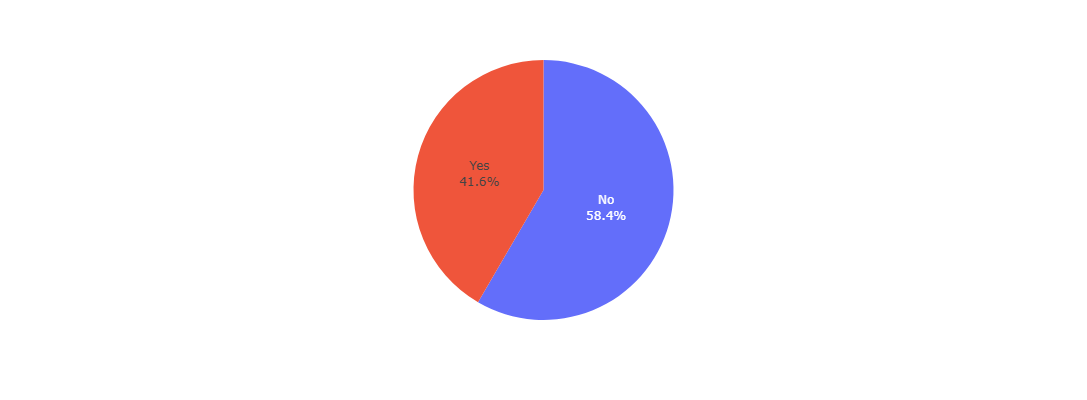

In [43]:
for col in data.columns:
    if data[col].dtype == object:
        uni.catstudy(data, col)
    elif data[col].dtype == 'float64':
        uni.ncstudy(data, col)
    elif data[col].dtype == 'int64':
        uni.ndstudy(data, col)
    elif data[col].dtype == 'datetime64[ns]':
        uni.datestudy(data, col)

•	Gender Distribution
Female: 54.4% | Male: 45.6%
The dataset has a slightly higher number of female students than male students.
This could indicate a growing interest in education among women in the field being analyzed
•	Institute Distribution
The largest share of students comes from CodeMasters (16.4%), followed by Tech Academy (15.2%) and SocialPrachar (14.1%).
Institutes like Naresh I Technologies (8.8%) and CyberSecure Institute (3.1%) have fewer students enrolled.
This may indicate the popularity and reputation of certain institutes in offering career-oriented programs.
•	Course Enrollment Distribution
Robotics (12.7%), Data Science (11.2%), and Python Programming (10%) are among the most popular courses.
Web Development (9.1%) and Cloud Computing (9.2%) have relatively lower enrollments compared to AI, ML, and Cybersecurity fields.
This could indicate that students are leaning more towards trending technologies like AI, Data Science, and Cybersecurity.
•	Course Duration Distribution
6-month courses are the most common (40.4%), followed by 5-month courses (29%).
Longer-duration courses (7 and 8 months) are less common, suggesting students prefer shorter, more intensive programs.
This may indicate a trend toward fast-track skill acquisition programs that focus on quicker employability.
•	Final Score Trends
Most students score between 70% to 100%, with some outliers beyond 100%(possibly due to extra credit)
A peak around 80-90% suggests a concentration of average-to-high performers.
•	Attendance Patterns
Attendance is generally high, with a significant number of students attending 80% or more
A cluster near 100% suggests a group of highly dedicated students
•	Age Distribution
The majority of students are aged between 21 and 26
Peaks at 22 and 24 indicate a mix of students from different educational backgrounds or intakes


In [52]:
                                                    Bi-Variate Analysis

SyntaxError: invalid syntax (2161012710.py, line 1)

In [54]:
                                                    PURE NUMERICAL DATA COLUMNS


SyntaxError: invalid syntax (295802258.py, line 1)

In [45]:
institution_counts = raw["Institute Name"].value_counts()
institution_counts

Institute Name
CodeMasters              164
Tech Academy             152
SocialPrachar            141
CyberSecure Institute    135
AI Hub                   125
Cloud Innovators         100
Levelup                   95
Naresh i technologies     88
Name: count, dtype: int64

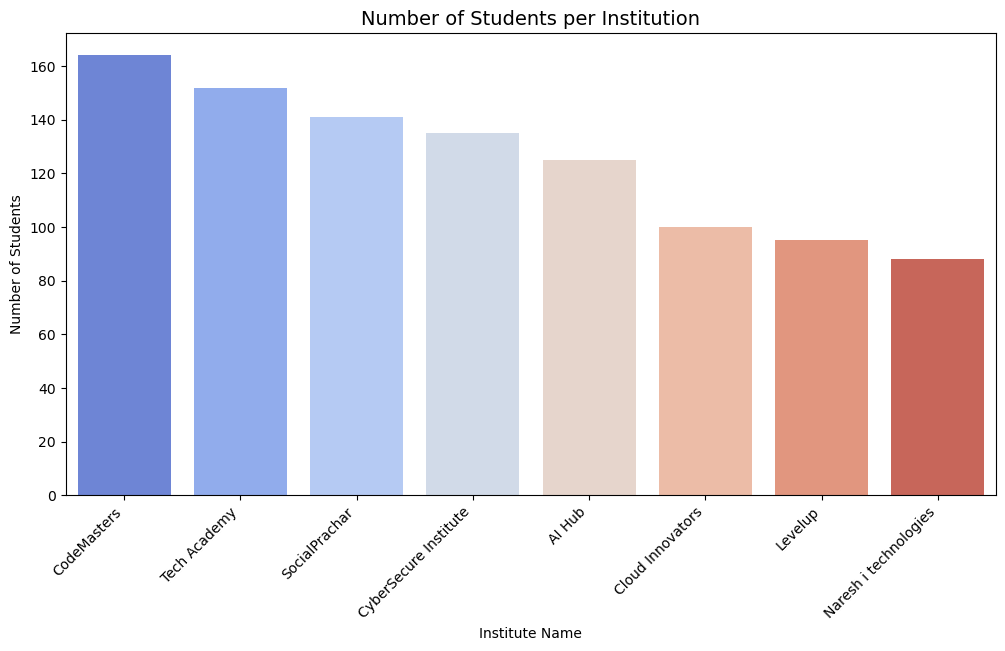

In [47]:
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=institution_counts.index, y=institution_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Institute Name")
plt.ylabel("Number of Students")
plt.title("Number of Students per Institution", fontsize=14)
plt.show()

In [48]:
# Count the number of male and female students per institution
gender_distribution = raw.groupby(["Institute Name", "Gender"]).size().unstack()
gender_distribution

Gender,Female,Male
Institute Name,,
AI Hub,74,51
Cloud Innovators,53,47
CodeMasters,82,82
CyberSecure Institute,78,57
Levelup,47,48
Naresh i technologies,48,40
SocialPrachar,75,66
Tech Academy,87,65


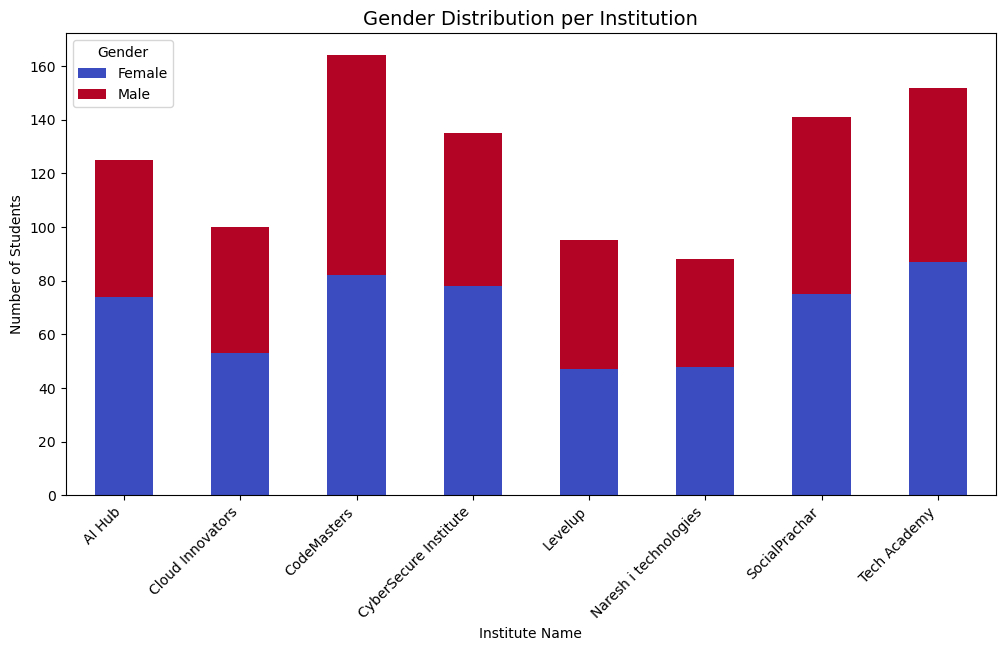

In [51]:
# Plot the distribution
gender_distribution.plot(kind="bar", figsize=(12, 6), stacked=True, colormap="coolwarm")
plt.xlabel("Institute Name")
plt.ylabel("Number of Students")
plt.title("Gender Distribution per Institution", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.show()

In [52]:
# Count the number of students enrolled in each course
course_counts = raw["Course Name"].value_counts()
course_counts

Course Name
Robotics              127
Data Science          112
Python Programming    100
Data Analytics         98
Ethical Hacking        97
AI &ML                 97
Web Development        95
Cloud Computing        92
Software Testing       91
Cybersecurity          91
Name: count, dtype: int64

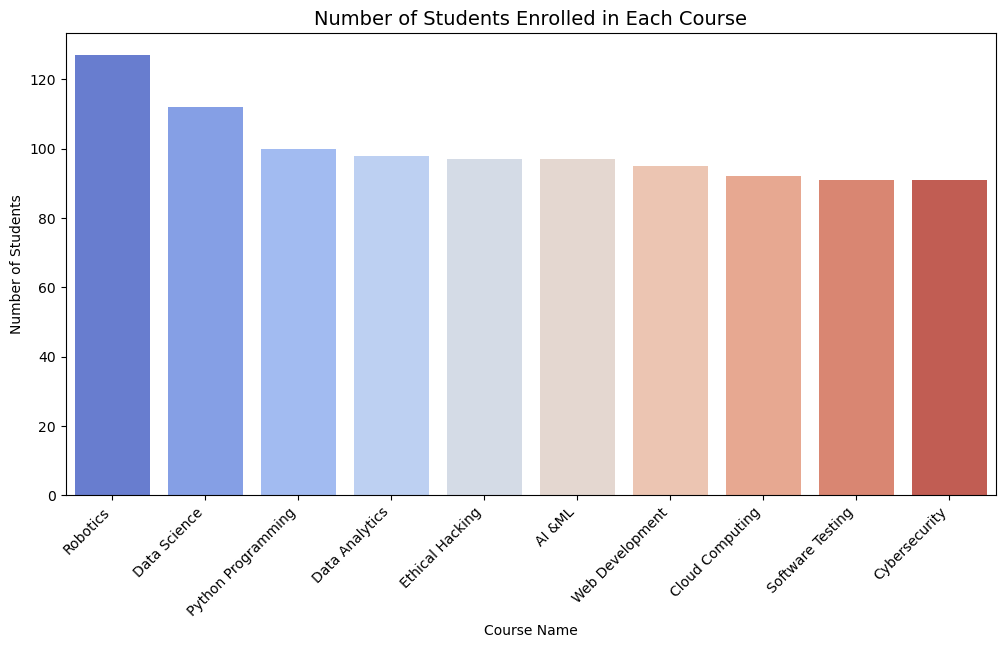

In [55]:
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=course_counts.index, y=course_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Course Name")
plt.ylabel("Number of Students")
plt.title("Number of Students Enrolled in Each Course", fontsize=14)
plt.show()

In [56]:
# Analyze certification impact on placement
certificate_placement = raw.groupby("Certification obtained")["Placement status"].value_counts(normalize=True).unstack() * 100
certificate_placement

Placement status,No,Yes
Certification obtained,,
AWS Specialization,59.70,40.30
Harvard University Professional Certificate,48.67,51.33
IIT Madras Course Completion,100.00,NaN
IIT Madras Standard Course,60.98,39.02
NASSCOM Certification,60.90,39.10
No Certification,58.87,41.13


<Figure size 1000x500 with 0 Axes>

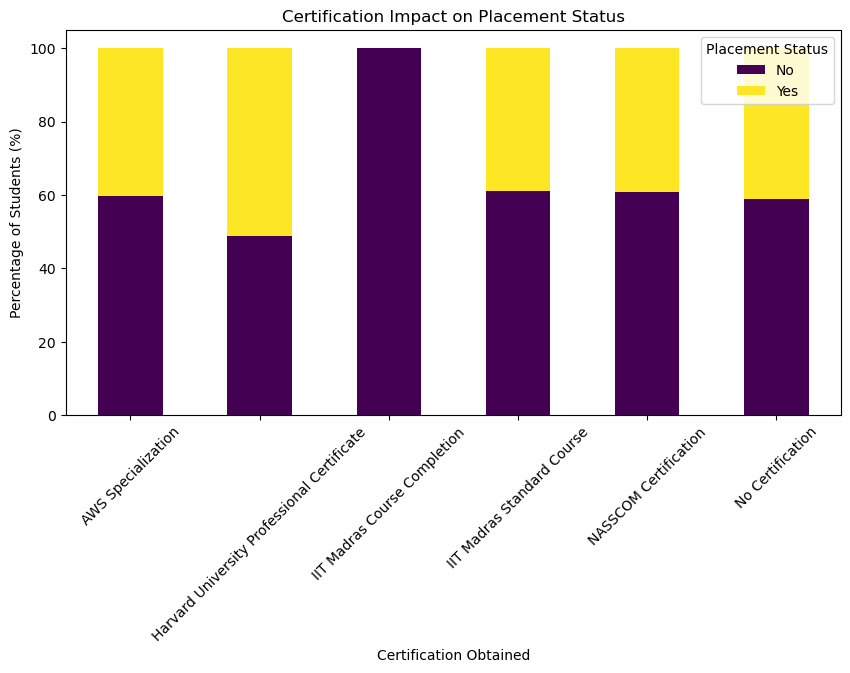

In [59]:
# Plot certification vs placement rate
plt.figure(figsize=(10, 5))
certificate_placement.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 5))
plt.title("Certification Impact on Placement Status")
plt.xlabel("Certification Obtained")
plt.ylabel("Percentage of Students (%)")
plt.legend(title="Placement Status")
plt.xticks(rotation=45)
plt.show()

In [61]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student Name            1000 non-null   object 
 1   Age                     979 non-null    float64
 2   Gender                  1000 non-null   object 
 3   Institute Name          1000 non-null   object 
 4   Course Name             1000 non-null   object 
 5   class_Type              1000 non-null   object 
 6   Duration                981 non-null    float64
 7   Assignments submitted   987 non-null    float64
 8   projects submitted      992 non-null    float64
 9   Mock_Test               987 non-null    float64
 10  Attendance(in %)        1000 non-null   int64  
 11  Certification obtained  1000 non-null   object 
 12  Final score(in %)       1000 non-null   int64  
 13  Placement status        1000 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory

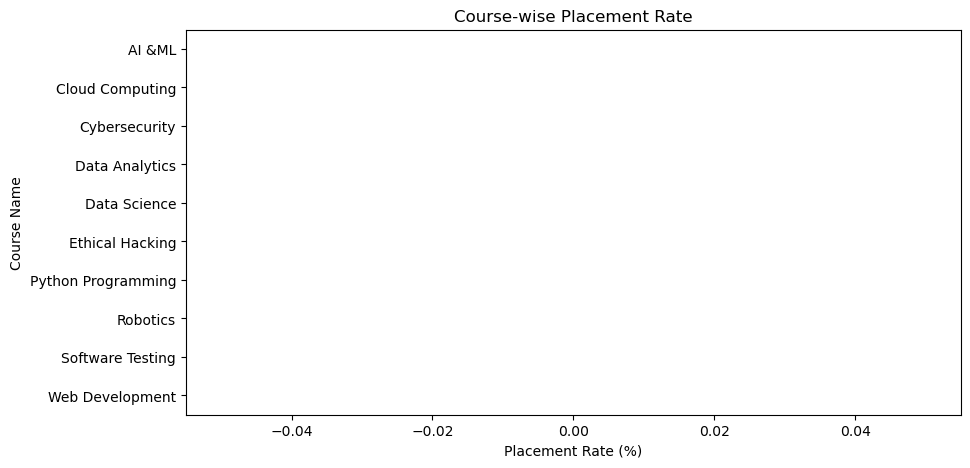

In [63]:
# Analyze course-wise performance and placement rates
course_analysis = raw.groupby("Course Name").agg(
    avg_final_score=("Final score(in %)", "mean"),
    placement_rate=("Placement status", lambda x: (x == "Placed").mean() * 100)
).reset_index().sort_values(by="placement_rate", ascending=False)

# Plot course-wise placement rates
plt.figure(figsize=(10, 5))
sns.barplot(y="Course Name", x="placement_rate", data=course_analysis, palette="viridis")
plt.title("Course-wise Placement Rate")
plt.xlabel("Placement Rate (%)")
plt.ylabel("Course Name")
plt.show()

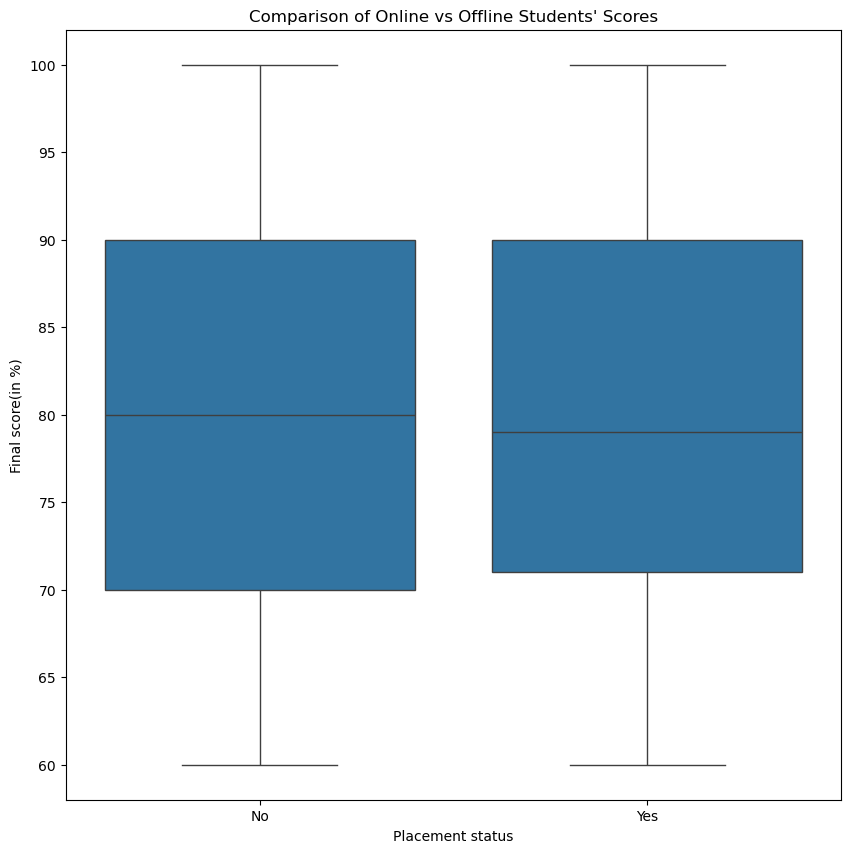

In [65]:
# Bivariate Analysis - Bar Plot: Course Mode vs. Final Score
plt.figure(figsize=(10,10))
sns.boxplot(data=raw, x="Placement status", y="Final score(in %)")
plt.title("Comparison of Online vs Offline Students' Scores")
plt.show()

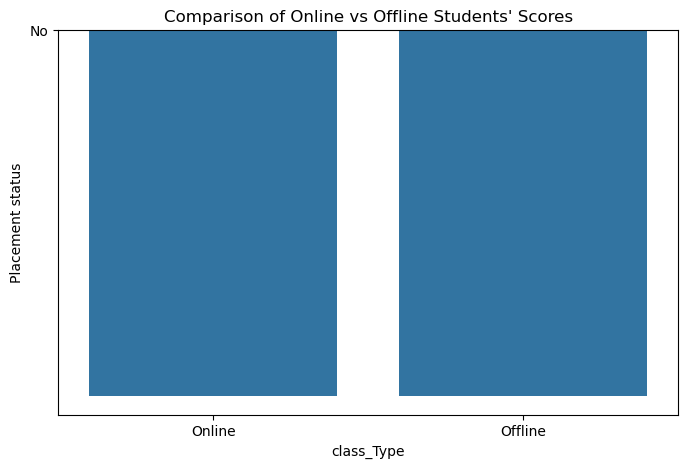

In [67]:
# Bivariate Analysis - Bar Plot: Course Mode vs. Final Score
plt.figure(figsize=(8,5))
sns.barplot(data=raw, x="class_Type", y="Placement status", ci=None)
plt.title("Comparison of Online vs Offline Students' Scores")
plt.show()

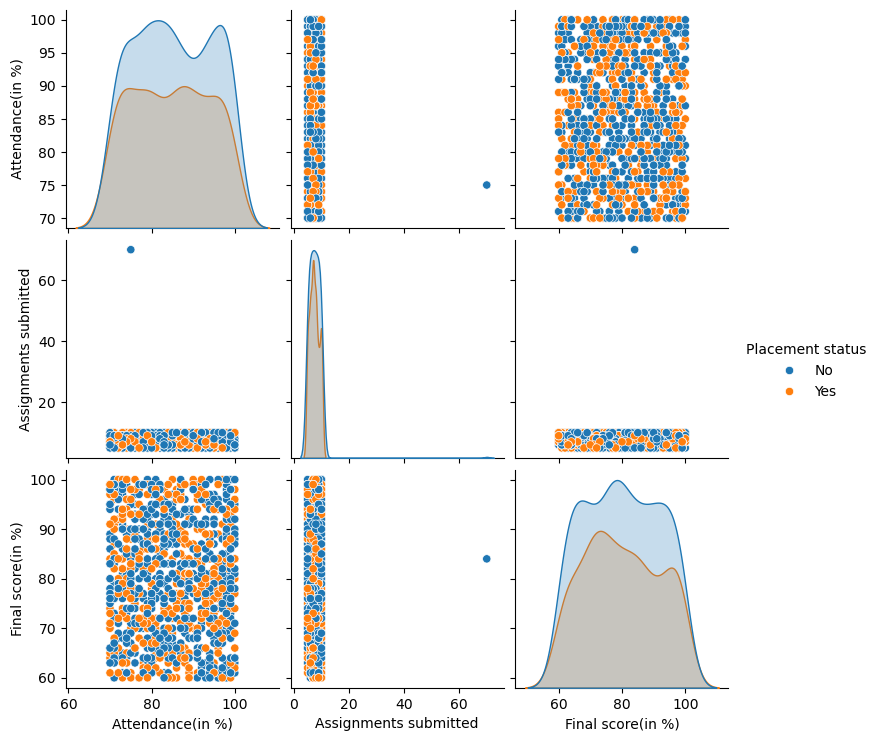

In [69]:
# Multivariate Analysis - Pairplot for Key Performance Indicators
sns.pairplot(raw, vars=["Attendance(in %)", "Assignments submitted","Final score(in %)"], hue="Placement status")
plt.show()

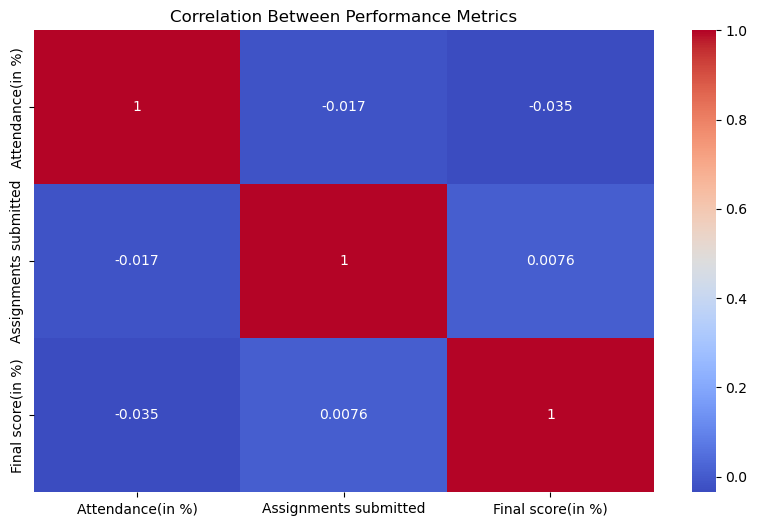

In [70]:
# Multivariate Analysis - Heatmap (Correlation Matrix)
plt.figure(figsize=(10,6))
sns.heatmap(raw[["Attendance(in %)", "Assignments submitted","Final score(in %)"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Performance Metrics")
plt.show()

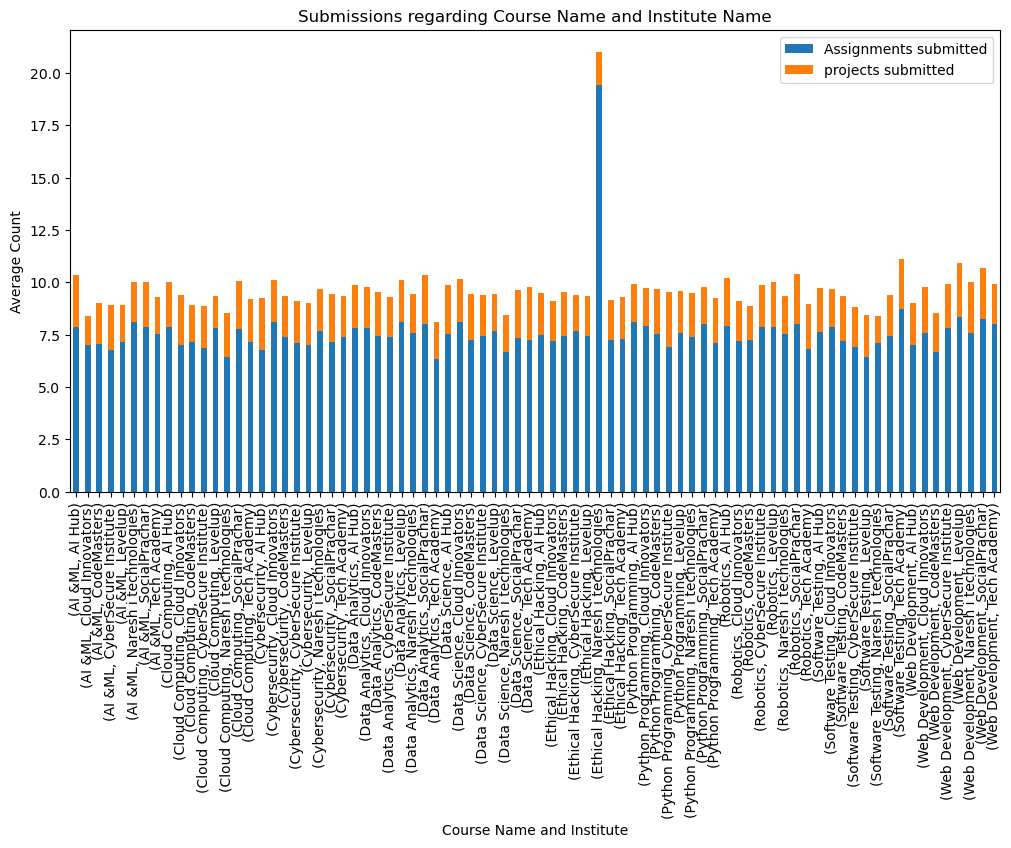

In [71]:
# Group by Type and InstituteName, then calculate the average Likes and Comments
institute_type = raw.groupby(['Course Name', 'Institute Name'])[['Assignments submitted', 'projects submitted']].mean()
institute_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Submissions regarding Course Name and Institute Name')
plt.ylabel('Average Count')
plt.xlabel('Course Name and Institute')
plt.show()

In [72]:
for col in raw.select_dtypes(include=[np.number]).columns:
    raw[col].fillna(raw[col].mean(), inplace=True)

In [73]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student Name            1000 non-null   object 
 1   Age                     1000 non-null   float64
 2   Gender                  1000 non-null   object 
 3   Institute Name          1000 non-null   object 
 4   Course Name             1000 non-null   object 
 5   class_Type              1000 non-null   object 
 6   Duration                1000 non-null   float64
 7   Assignments submitted   1000 non-null   float64
 8   projects submitted      1000 non-null   float64
 9   Mock_Test               1000 non-null   float64
 10  Attendance(in %)        1000 non-null   int64  
 11  Certification obtained  1000 non-null   object 
 12  Final score(in %)       1000 non-null   int64  
 13  Placement status        1000 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory

In [75]:
categorical_cols = ['Gender','Course Name','Certification obtained']
raw = pd.get_dummies(raw, columns=[col for col in categorical_cols], drop_first=False)

In [77]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
raw['Placement status']=label_encoder.fit_transform(raw['Placement status'])
raw['Placement status'].unique()

array([0, 1])

In [78]:
raw['class_Type']=label_encoder.fit_transform(raw['class_Type'])
raw['class_Type'].unique()

array([1, 0])

In [79]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Student Name                                                        1000 non-null   object 
 1   Age                                                                 1000 non-null   float64
 2   Institute Name                                                      1000 non-null   object 
 3   class_Type                                                          1000 non-null   int32  
 4   Duration                                                            1000 non-null   float64
 5   Assignments submitted                                               1000 non-null   float64
 6   projects submitted                                                  1000 non-null   float64
 7   Mock_Test       

In [81]:
raw.columns

Index(['Student Name', 'Age', 'Institute Name', 'class_Type', 'Duration',
       'Assignments submitted', 'projects submitted', 'Mock_Test',
       'Attendance(in %)', 'Final score(in %)', 'Placement status',
       'Gender_Female', 'Gender_Male', 'Course Name_AI &ML',
       'Course Name_Cloud Computing', 'Course Name_Cybersecurity',
       'Course Name_Data Analytics', 'Course Name_Data Science',
       'Course Name_Ethical Hacking', 'Course Name_Python Programming',
       'Course Name_Robotics', 'Course Name_Software Testing',
       'Course Name_Web Development',
       'Certification obtained_AWS Specialization',
       'Certification obtained_Harvard University Professional Certificate',
       'Certification obtained_IIT Madras Course Completion',
       'Certification obtained_IIT Madras Standard Course',
       'Certification obtained_NASSCOM Certification',
       'Certification obtained_No Certification'],
      dtype='object')

In [89]:
x = raw[['Age', 'class_Type', 'Duration',
       'Assignments submitted', 'projects submitted', 'Mock_Test',
       'Attendance(in %)', 'Final score(in %)', 'Placement status',
       'Gender_Female', 'Gender_Male', 'Course Name_AI &ML',
       'Course Name_Cloud Computing', 'Course Name_Cybersecurity',
       'Course Name_Data Analytics', 'Course Name_Data Science',
       'Course Name_Ethical Hacking', 'Course Name_Python Programming',
       'Course Name_Robotics', 'Course Name_Software Testing',
       'Course Name_Web Development',
       'Certification obtained_AWS Specialization',
       'Certification obtained_Harvard University Professional Certificate',
       'Certification obtained_IIT Madras Course Completion',
       'Certification obtained_IIT Madras Standard Course',
       'Certification obtained_NASSCOM Certification',
       'Certification obtained_No Certification']]

In [91]:
y = raw[['Placement status']]

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 27) (250, 27) (750, 1) (250, 1)


In [106]:
                                             Random Forest Classifier

SyntaxError: invalid syntax (73192357.py, line 1)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

In [97]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [99]:
RF_clf = RandomForestClassifier(n_estimators=50,random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True)
RF_clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=0)

In [101]:
test_pred = RF_clf.predict(x_test)
train_pred = RF_clf.predict(x_train)

In [103]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
train_accu = accuracy_score(y_train,train_pred)
print(train_accu)
test_accu = accuracy_score(y_test,test_pred)
print(test_accu)

1.0
1.0


In [105]:
test_confusion_matrix_1 = confusion_matrix(y_test,test_pred)
print(test_confusion_matrix_1)

[[140   0]
 [  0 110]]


In [107]:
test_classification_report_1 = classification_report(y_test,test_pred)
print(test_classification_report_1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       110

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [147]:
imp_features=RF_clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[:15]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
params = {'max_depth': range(1,10,2),
          'max_features': ['sqrt','log2'],
          'n_estimators': [20, 40, 60, 80, 100, 120],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10]
         }

Grid_randomF = GridSearchCV(RandomForestClassifier(random_state=15), params)
Grid_randomF.fit(x_train, y_train)
print(Grid_randomF.best_params_)

In [ ]:
                                                          Naive Bayes Theorem

In [109]:
from sklearn.naive_bayes import GaussianNB

In [111]:
clf = GaussianNB(var_smoothing = 0.001)
clf.fit(x_train,y_train)

GaussianNB(var_smoothing=0.001)

In [113]:
test_pred = clf.predict(x_test)
train_pred = clf.predict(x_train)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
train_accu = accuracy_score(y_train,train_pred)
print("train_accu",train_accu)
test_accu = accuracy_score(y_test,test_pred)
print("test_accu",test_accu)

train_accu 1.0
test_accu 1.0


In [117]:
test_confusion_matrix_1 = confusion_matrix(y_test,test_pred)
print(test_confusion_matrix_1)

[[140   0]
 [  0 110]]


In [119]:
test_classification_report_1 = classification_report(y_test,test_pred)
print(test_classification_report_1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       110

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
                                                  K-Nearest Neighbour

In [121]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)# initializing
classifier.fit(x_train,y_train)#fitting train data

KNeighborsClassifier(n_neighbors=3)

In [123]:
test_predictions = classifier.predict(x_test)
train_predictions = classifier.predict(x_train)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
train_accuracy = accuracy_score(y_train,train_predictions)
print(train_accuracy)
test_accuracy = accuracy_score(y_test,test_predictions)
print(test_accuracy)

0.932
0.756


In [127]:
test_classification_report = classification_report(y_test,test_predictions)
print(test_classification_report)

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       140
           1       0.78      0.62      0.69       110

    accuracy                           0.76       250
   macro avg       0.76      0.74      0.74       250
weighted avg       0.76      0.76      0.75       250



In [ ]:
                                                       Decision Tree Classifier

In [129]:
from sklearn.tree import DecisionTreeClassifier
decisionTree_model = DecisionTreeClassifier(criterion='gini')

In [131]:
decisionTree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
test_pred = decisionTree_model.predict(x_test)
train_pred = decisionTree_model.predict(x_train)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
train_accur = accuracy_score(y_train,train_pred)
print(train_accur)
test_accur = accuracy_score(y_test,test_pred)
print(test_accur)

1.0
1.0


In [137]:
test_confusion_matrix_1 = confusion_matrix(y_test,test_pred)
print(test_confusion_matrix_1)

[[140   0]
 [  0 110]]


In [139]:
test_classification_report_1 = classification_report(y_test,test_pred)
print(test_classification_report_1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       110

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
                                                        SVM

In [148]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log.intercept_
log.coef_
#print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

array([[ 1.41348677e-02,  3.15629863e-02,  1.80848735e-02,
        -4.95848166e-02, -8.74278987e-03, -2.34271258e-02,
        -3.43739390e-02,  2.52127921e-02,  4.92102368e+00,
         1.92994276e-02, -1.92994276e-02,  1.14935239e-02,
         1.26063520e-02, -2.71662754e-02,  4.09810299e-02,
         7.59001090e-03,  1.45805646e-03,  5.89947475e-03,
         1.79697832e-02, -2.20849179e-02, -4.90552313e-02,
        -1.36809652e-02,  6.89623603e-02, -3.99305437e-02,
        -1.89235290e-02, -3.66538729e-02,  5.16063790e-03]])

In [150]:
train_accur = accuracy_score(y_train,train_pred)
print(train_accur)
test_accur = accuracy_score(y_test,test_pred)
print(test_accur)

1.0
1.0


### XGBOOST

In [152]:
pip install xgboost scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [156]:
import xgboost as xgb

In [160]:
# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False)

# Train the model
xgb_clf.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [164]:
# Predict on test set
y_pred = xgb_clf.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


### Hyperparameter Tuning


In [168]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


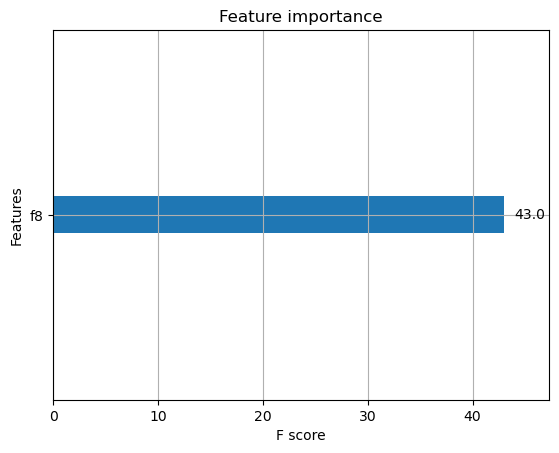

In [170]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_clf)
plt.show()


### SVM

In [180]:
from sklearn.svm import SVC

In [182]:
# Initialize SVM model with RBF kernel
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_clf.fit(x_train, y_train)

SVC()

In [184]:
# Predict on test set
y_pred = svm_clf.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       110

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [188]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
